# Shahid Abdul Farhad

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [143]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
988,7.7,0.39,0.12,1.7,0.097,19.0,27.0,0.99596,3.16,0.49,9.4,5
410,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6
1412,8.2,0.24,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6
889,10.7,0.90,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
1336,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5


In [144]:
df.value_counts(df['quality'])

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [145]:
# Convert quality into binary labels
df['quality'] = (df['quality'] >= 6).astype(int)

In [146]:
df['quality']

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


## Train Test Splitting

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.2,random_state=42,stratify=df['quality'])

In [148]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.99720,3.40,0.61,10.2
1391,8.0,0.640,0.22,2.4,0.094,5.0,33.0,0.99612,3.37,0.58,11.0
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1
461,8.3,0.615,0.22,2.6,0.087,6.0,19.0,0.99820,3.26,0.61,9.3
346,6.6,0.815,0.02,2.7,0.072,17.0,34.0,0.99550,3.58,0.89,12.3
...,...,...,...,...,...,...,...,...,...,...,...
859,6.8,0.560,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2
741,9.2,0.530,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5
1550,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.5
536,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4


# Using Standard Scaler

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
X_train_scaled

array([[-0.59096646, -0.08898536, -0.47926523, ...,  1.3506617 ,
         0.43263109, -0.8741677 ],
       [-0.93251464,  0.07896192, -0.73734044, ...,  1.93541674,
        -0.11163301, -0.5942794 ],
       [ 0.43367806, -0.14496778,  0.14011526, ...,  0.05120607,
         0.31168351,  0.05879332],
       ...,
       [-0.64789116,  0.75075102, -1.25349085, ...,  1.41563448,
        -0.53494953, -0.6875755 ],
       [-1.27406281,  1.00267194, -0.89218556, ...,  1.87044395,
         0.00931457, -0.22109499],
       [ 0.83215092, -0.08898536, -0.42765019, ..., -0.53354896,
        -0.47447574,  0.05879332]])

## Performing EDA

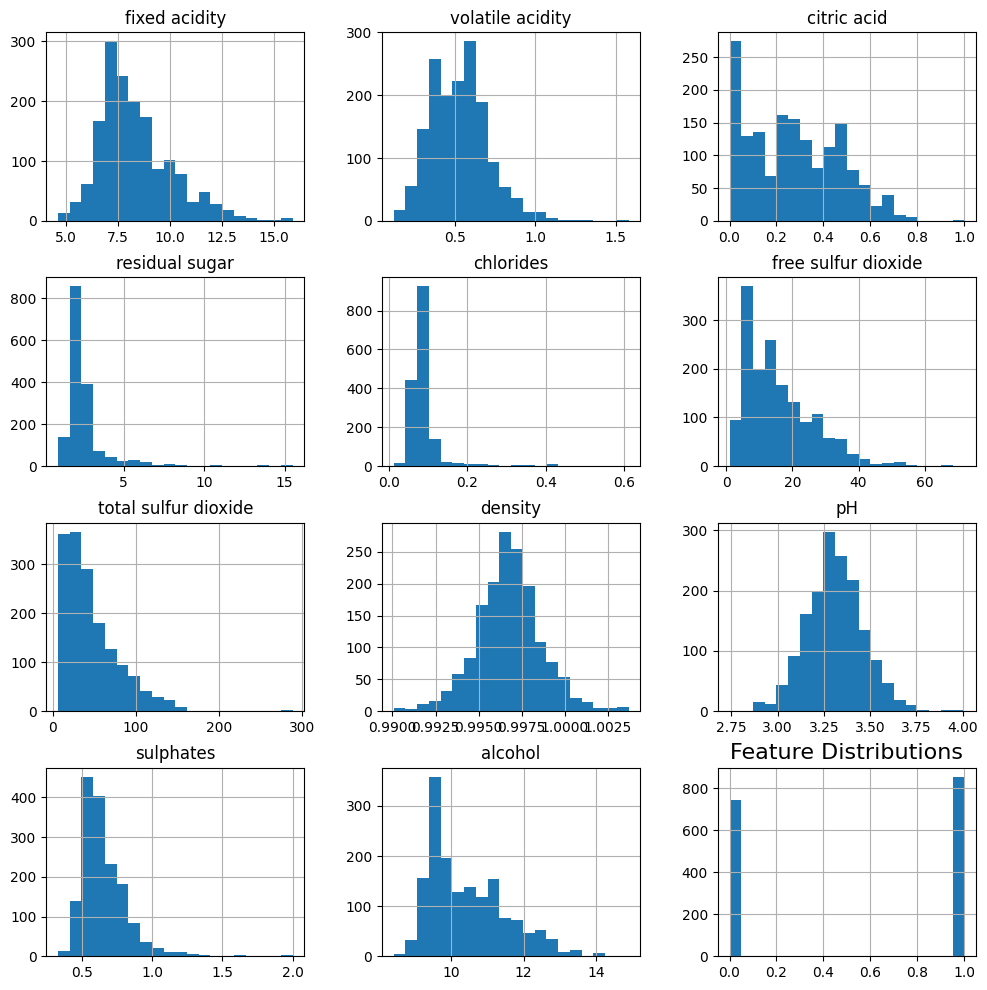

In [151]:
# Plot feature distributions
df.hist(figsize=(12, 12), bins=20)
plt.title("Feature Distributions", fontsize=16)
plt.show()

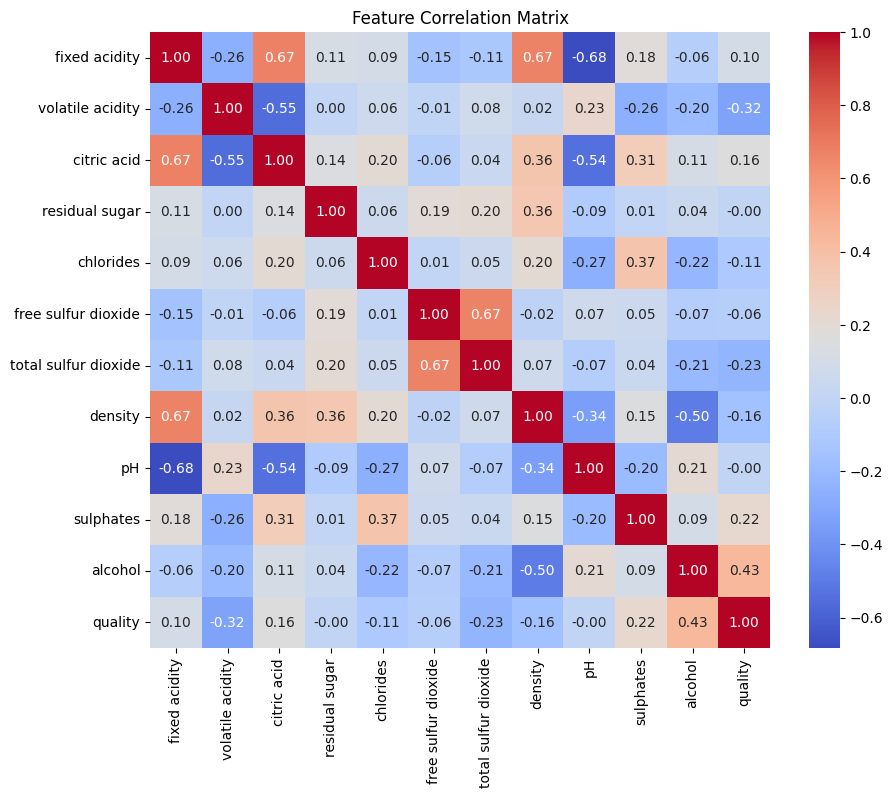

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


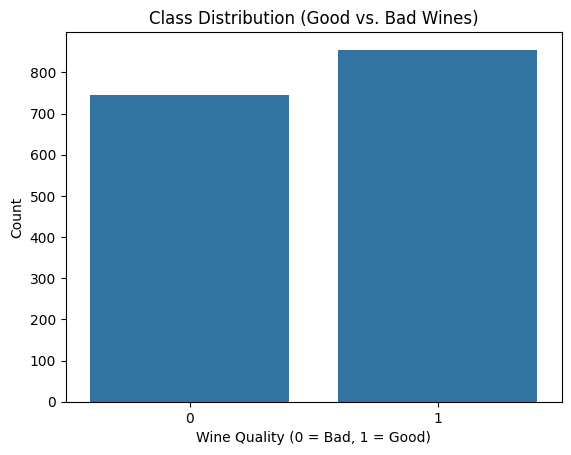

In [153]:
sns.countplot(x=df['quality'])
plt.title("Class Distribution (Good vs. Bad Wines)")
plt.xlabel("Wine Quality (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()


# Build and Train an MLP Classifier using TensorFlow

In [154]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [155]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [158]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)


In [159]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32,callbacks=[early_stop])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4768 - loss: 0.7198 - val_accuracy: 0.6500 - val_loss: 0.6507
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.6457 - val_accuracy: 0.7188 - val_loss: 0.6182
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7330 - loss: 0.6136 - val_accuracy: 0.7406 - val_loss: 0.5897
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7673 - loss: 0.5626 - val_accuracy: 0.7594 - val_loss: 0.5423
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.5069 - val_accuracy: 0.7563 - val_loss: 0.5110
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.4781 - val_accuracy: 0.7500 - val_loss: 0.5061
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7800 - loss: 0.4833 - val_accuracy: 0.7500 - val_loss: 0.4958
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7999 - loss: 0.4468 - val_accuracy: 0.7500 - val_loss

In [160]:
model.get_weights()

[array([[ 1.17549524e-01, -9.90869827e-04,  8.44970569e-02,
          1.46552488e-01,  1.45763531e-01,  1.07380226e-01,
         -1.78587753e-02, -2.51640320e-01, -1.89990714e-01,
          5.06191701e-02, -1.78495288e-01, -5.16520701e-02,
         -7.59418914e-03,  2.69060787e-02, -2.74176478e-01,
          1.04063794e-01, -3.23648304e-01,  1.53672367e-01,
          1.69542551e-01, -2.17553258e-01,  1.86955258e-01,
          2.63105810e-01,  3.89376357e-02,  8.67196992e-02,
         -2.96330124e-01,  5.42760193e-02, -3.50913964e-02,
          7.94751123e-02, -8.38577971e-02, -3.46865356e-02,
          2.33015031e-01,  4.06953655e-02, -1.22553311e-01,
          1.60728663e-01,  4.32409393e-03, -1.58418521e-01,
          1.80872962e-01, -2.14482233e-01, -1.50429696e-01,
         -2.56898254e-02,  2.12976094e-02, -1.22530302e-02,
         -1.54592171e-01, -2.29469076e-01, -7.95632824e-02,
          6.30092695e-02,  2.51920402e-01,  2.35159352e-01,
          8.02842062e-03, -2.15140387e-0

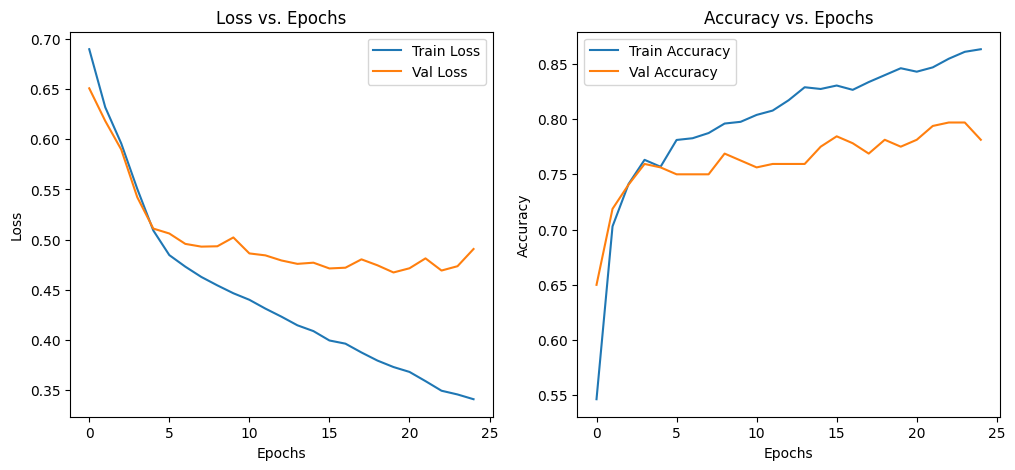

In [163]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


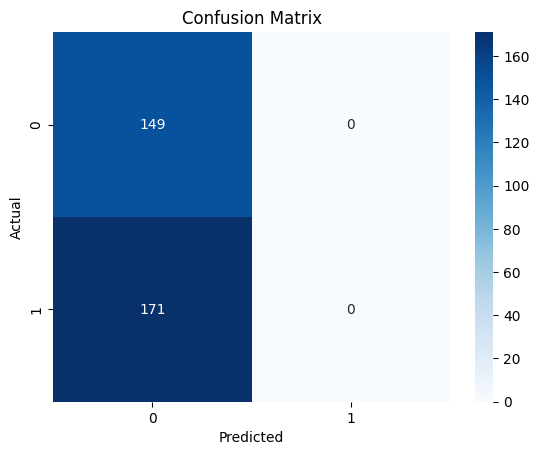

In [162]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
